Pada submission ini berupa program jaringan saraf tiruan yang menggunakan TensorFlow. Adapun program ini diharuskan untuk mengenali bentuk tangan yang membentuk batu, gunting dan kertas

Langkah pertama adalah mengunduh dataset yang telah disediakan dengan wget command

In [4]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /media/rockpaperscissors.zip

--2021-07-18 05:11:03--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/media/rockpaperscissors.zip’

/media/rockpapersci 100%[===================>] 307.92M  4.03MB/s    in 74s     

2021-07-18 05:12:18 (4.15 MB/s) - ‘/media/rockpaperscissors.zip’ saved [322873683/322873683]



Setelah dataset terdownload maka dataset diekstrak terlebih dahulu dan diletakkan di folder media

In [5]:
#mengimport modul untuk mengekstrak dataset yang telah di download 
import zipfile
import os 

local_zip = '/media/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/media')
zip_ref.close()

setelah itu, mengecek terlebih dahulu apakah file dataset telah terekstrak dengan baik, dan mengecek jumlah masing-masing gambar 

In [10]:
os.listdir('/media/rockpaperscissors/')

['paper', 'scissors', 'rock', 'README_rpc-cv-images.txt', 'rps-cv-images']

In [16]:
#melihat jumlah gambar batu atau rock
print('Jumlah gambar batu:' ,len(os.listdir('/media/rockpaperscissors/rock')))

#melihat jumlah gambar kertas atau paper
print('Jumlah gambar kertas:' ,len(os.listdir('/media/rockpaperscissors/paper')))

#melihat jumlah gambar gunting atauu scissors
print('Jumlah gambar gunting:' ,len(os.listdir('/media/rockpaperscissors/scissors')))

Jumlah gambar batu: 726
Jumlah gambar kertas: 712
Jumlah gambar gunting: 750


selanjutnya mengimport library yang dibutuhkan. Dalam hal ini yaitu TensorFlow dan Sklearn

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split

selanjutnya membuat directory baru untuk train dan validation 

In [27]:
basis_dir = '/media/rockpaperscissors'

#membuat training folder
training_fold = os.path.join(basis_dir, 'training')

#membuat validation folder
validation_fold = os.path.join(basis_dir, 'validation')

Jika folder yang dibuat tidak ada maka membuatnya ulang dengan menggunakan method mkdir

In [28]:
#membuat ulang training folder
if not os.path.exists(training_fold):
    os.mkdir(training_fold)

#membuat ulang validation folder
if not os.path.exists(validation_fold):
    os.mkdir(validation_fold)

In [29]:
batu_fold = os.path.join('/media/rockpaperscissors/rock')
kertas_fold = os.path.join('/media/rockpaperscissors/paper')
gunting_fold = os.path.join('/media/rockpaperscissors/scissors')

langkah selanjutnya memecah folder menjadi training dan validation menggunakan train_tes_Split

In [30]:
#memecah folder batu
train_batu_fold, val_batu_fold = train_test_split(os.listdir(batu_fold), test_size = 0.4 )

#memecah folder kertas
train_kertas_fold, val_kertas_fold = train_test_split(os.listdir(kertas_fold), test_size = 0.4 )

#memecah folder gunting
train_gunting_fold, val_gunting_fold = train_test_split(os.listdir(gunting_fold), test_size = 0.4)

selanjutnya membuat subfolder dari folder training dan folder validation

In [42]:
#membuat subfolder training
train_batu = os.path.join(training_fold, 'rock')
train_kertas = os.path.join(training_fold, 'paper')
train_gunting = os.path.join(training_fold, 'scissors')

#jika folder tidak ada maka membuat ulang folder
if not os.path.exists(train_batu):
    os.mkdir(train_batu)
if not os.path.exists(train_kertas):
    os.mkdir(train_kertas)
if not os.path.exists(train_gunting):
    os.mkdir(train_gunting)


In [43]:
#membuat subfolder validation
val_batu = os.path.join(validation_fold, 'rock')
val_kertas = os.path.join(validation_fold, 'paper')
val_gunting = os.path.join(validation_fold, 'scissors')

#jika folder tidak ada maka membuat ulang folder
if not os.path.exists(val_batu):
    os.mkdir(val_batu)
if not os.path.exists(val_kertas):
    os.mkdir(val_kertas)
if not os.path.exists(val_gunting):
    os.mkdir(val_gunting)

setelah subfolder terbuat maka selanjutnya mengcopy data dengan menggunakan library shutil 

In [44]:
#import terlebih dahulu library shutil 
import shutil 

In [45]:
#mengcopy data train ke dalam subfolder
for i in train_batu_fold:
    shutil.copy(os.path.join(batu_fold, i), os.path.join(train_batu, i))
for i in train_kertas_fold:
    shutil.copy(os.path.join(kertas_fold, i), os.path.join(train_kertas, i))
for i in train_gunting_fold:
    shutil.copy(os.path.join(gunting_fold, i), os.path.join(train_gunting, i))

In [46]:
#mengcopy data validation ke dalam subfolder 
for j in val_batu_fold:
    shutil.copy(os.path.join(batu_fold, j), os.path.join(val_batu, j))
for j in val_kertas_fold:
    shutil.copy(os.path.join(kertas_fold, j), os.path.join(val_kertas, j))
for j in val_gunting_fold:
    shutil.copy(os.path.join(gunting_fold, j), os.path.join(val_gunting, j))

selanjutnya melakukan augmentasi gambar 

In [47]:
training_datagenerat = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True,
    fill_mode='nearest',
)

testing_datagenerat = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    shear_range = 0.2,
    zoom_range=0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

selanjutnya melakukan pemecahan data 

In [48]:
train_generat = training_datagenerat.flow_from_directory(
    training_fold,
    target_size=(100,150),
    batch_size=32,
    shuffle=True,
    class_mode='categorical'
)

validation_generat = testing_datagenerat.flow_from_directory(
    validation_fold,
    target_size=(100,150),
    batch_size=32,
    class_mode='categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


data berhasil dipecah, yaitu validation set 40%

langkah selanjutnya adalah membangun model jaringan saraf tiruan menggunakan keras

In [49]:
modell = tf.keras.models.Sequential([
                                    
    #layer Konvolusi pertama dengan input gambar 100x150 dengan 3 byte warna                          
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    #layer konvulasi kedua
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    #Layer input untuk Deep Learning Neural Network
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    #Hiden layer kedua dengan 512 neuron
    tf.keras.layers.Dense(512, activation='relu'),

    #Layer output
    tf.keras.layers.Dense(3, activation='softmax')
])

selanjutnya mengkompilasi modell dengan optimizer rmsprop dan menggunakan loss function categorical crossentropy 

In [59]:
modell.compile(optimizer='rmsprop',
               loss='categorical_crossentropy', 
               metrics=['accuracy'])

lalu melatih model jaringan saraf tiruan

In [60]:
modell.fit(
    train_generat,
    epochs=20,
    steps_per_epoch=25,
    validation_data=validation_generat,
    validation_steps=5,
    verbose=2,
)

Epoch 1/20
25/25 - 18s - loss: 0.5681 - accuracy: 0.9112 - val_loss: 0.2577 - val_accuracy: 0.8938
Epoch 2/20
25/25 - 17s - loss: 0.1549 - accuracy: 0.9613 - val_loss: 0.1119 - val_accuracy: 0.9812
Epoch 3/20
25/25 - 17s - loss: 0.2005 - accuracy: 0.9525 - val_loss: 0.0748 - val_accuracy: 0.9812
Epoch 4/20
25/25 - 17s - loss: 0.0641 - accuracy: 0.9800 - val_loss: 0.0708 - val_accuracy: 0.9875
Epoch 5/20
25/25 - 17s - loss: 0.1396 - accuracy: 0.9475 - val_loss: 0.0479 - val_accuracy: 0.9875
Epoch 6/20
25/25 - 17s - loss: 0.0522 - accuracy: 0.9825 - val_loss: 0.3896 - val_accuracy: 0.8938
Epoch 7/20
25/25 - 17s - loss: 0.0884 - accuracy: 0.9650 - val_loss: 0.2576 - val_accuracy: 0.8813
Epoch 8/20
25/25 - 17s - loss: 0.1333 - accuracy: 0.9638 - val_loss: 0.1387 - val_accuracy: 0.9563
Epoch 9/20
25/25 - 17s - loss: 0.0809 - accuracy: 0.9725 - val_loss: 0.0790 - val_accuracy: 0.9812
Epoch 10/20
25/25 - 17s - loss: 0.0725 - accuracy: 0.9800 - val_loss: 0.0502 - val_accuracy: 0.9750
Epoch 11/

uji coba model klasifikasi gambar 

In [61]:
#import semua library yang dibutuhkan
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Saving rsz_gambarr.jpg to rsz_gambarr (3).jpg
rsz_gambarr.jpg
Gambar tangan tersebut menunjukkan bentuk gunting


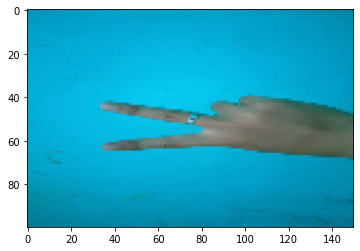

In [66]:
%matplotlib inline

upload_gambar = files.upload()

for fn in upload_gambar.keys():
    path = fn
    img = image.load_img(path, target_size=(100,150))
    imgplot = plt.imshow(img)
    y = image.img_to_array(img)
    y = np.expand_dims(y, axis=0)

    gambar = np.vstack([y])
    kelas = modell.predict(gambar, batch_size=10)

    print(fn)
    if kelas[0][0] == 1:
        print('Gambar tangan tersebut menunjukkan bentuk kertas')
    elif kelas[0][1] == 1:
        print('Gambar tangan tersebut menunjukkan bentuk batu')
    elif kelas[0][2] == 1:
        print('Gambar tangan tersebut menunjukkan bentuk gunting')
    else:
        print('Gambar tidak diketahui') 

model telah selesai di uji coba dan hasilnya tepat 

Sekian dan Terima Kasih